In [10]:
# initial imports
import yfinance as yf
import pandas as pd

tickers = ['XOM', 'SAVE', 'AAL', 'UAL']
data = yf.download(tickers, start='2010-01-01', end='2023-01-01')

[*********************100%%**********************]  4 of 4 completed


In [11]:
# Save the data to CSV files
data.to_csv('stock_data.csv')

In [12]:
import pandas as pd

data = pd.read_csv('stock_data.csv', header=[0, 1], index_col=0)

<Axes: xlabel='Date'>

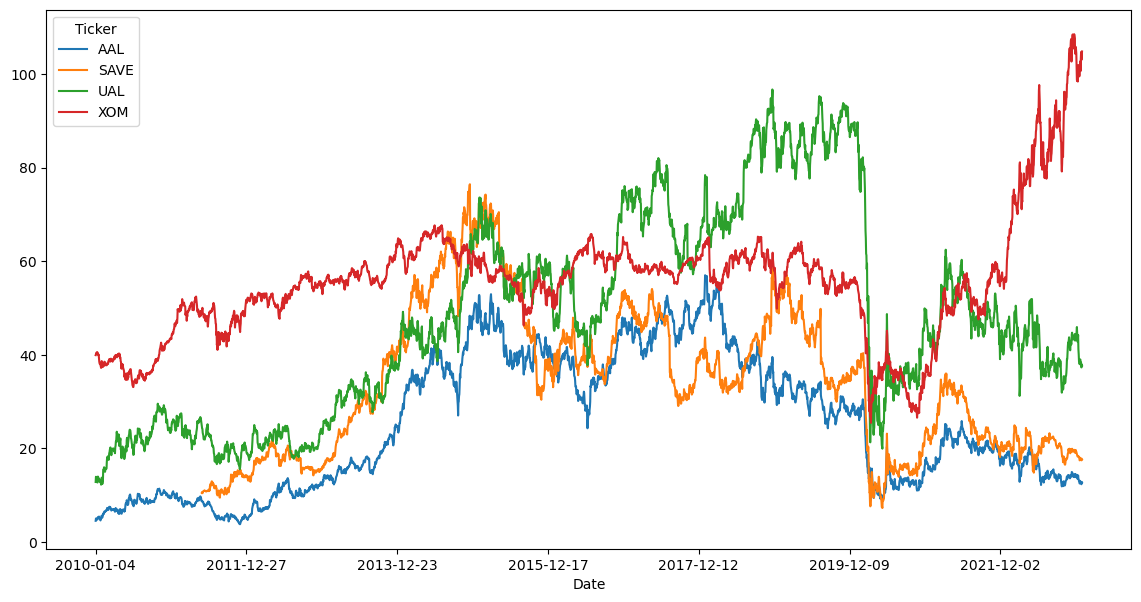

In [13]:
# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()

# Plotting the data
data['Adj Close'].plot(figsize=(14, 7))

In [14]:
# Fill missing values with the previous value
data = data.fillna(method='ffill')

# Drop any remaining missing values
data = data.dropna()


C:\Users\ogame\AppData\Local\Temp\ipykernel_21756\2399427112.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [15]:
# Descriptive statistics
descriptive_stats = data.describe()

In [16]:
# Calculate daily returns
daily_returns = data['Adj Close'].pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

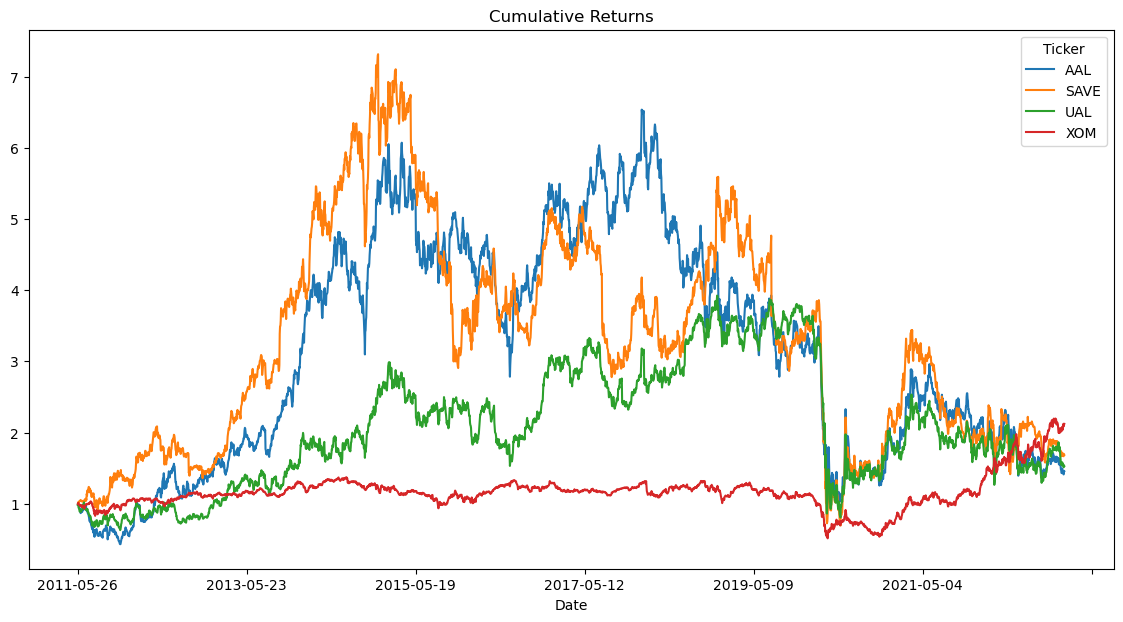

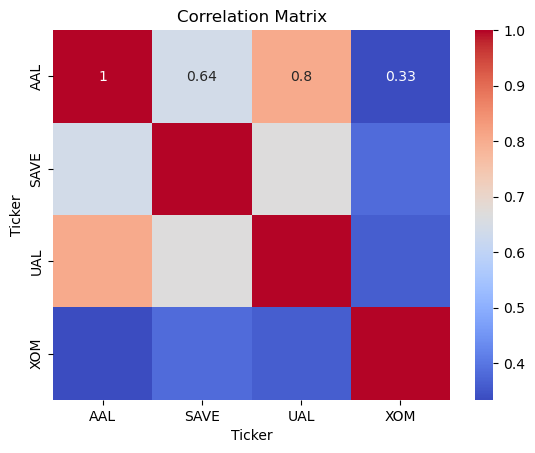

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 7))
plt.title('Cumulative Returns')
plt.show()

# Plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
